# Session 1 - Introduction to Pandas

Pandas is an open source Python package that is most widely used for data science/data analysis and machine learning tasks. It is built on top of another package named Numpy, which provides support for multi-dimensional arrays.

https://pandas.pydata.org/

- Data cleansing
- Data fill
- Data normalization
- Merges and joins
- Data visualization
- Statistical analysis
- Data inspection
- Loading and saving data

Before it can be used it needs to be imported.

In [83]:
import pandas as pd
import numpy as np
import datetime as dt

## Series

On the most basic level Pandas is built on a datastructure called Series.

A series is used to hold 1-dimentional data similar to a list.

Other than a list which only holds the data a Series holds some additional information:
- Name
- Index

In [21]:
SampleSeries = pd.Series([15, 13, 11, 9],
                         name = 'ages')
print(SampleSeries)

0    15
1    13
2    11
3     9
Name: ages, dtype: int64


The index can be almost anything. Also non-numeric.

In [22]:
SampleSeries2 = pd.Series([15, 13, 11, 9],
                         name = 'ages',
                         index = ['Layla', 'Mia', 'Laurin', 'Lea'])
print(SampleSeries2)

Layla     15
Mia       13
Laurin    11
Lea        9
Name: ages, dtype: int64


To access elements we can use the index.

In [20]:
print(f"Age of the second child on the list: {SampleSeries[1]}")
print(f"Layla's age: {SampleSeries2['Layla']}")

Age of the second child on the list: 13
Layla's age: 15


Also a boolean map can be used to access or filter certain elements.

In [23]:
girl = [True, True, False, True]

Girls = SampleSeries2[girl]
print(Girls)

Layla    15
Mia      13
Lea       9
Name: ages, dtype: int64


### Aggregations

Aggregation methods collapse the values of a Series down to a scalar.

They can be things like:
- How many (count)
- Total (sum)
- Average (mean)

Pandas Series give many aggregate functions and some aggregate properties.

Here a list of the most common ones (referencing the Series object "sample"):

- `sample.mean()` Returns the average value.
- `sample.is_unique` Returns if the values are unique
- `sample.quantile(q)` Returns the 50% quantile value if q is not set. If q is set it returns the q-th quantile or quantiles.
- `sample.count()` Returns the number of values
- `sample.min()` Returns the minimum
- `sample.max()` Returns the maximum
- `sample.median()` Returns the median value
- `sample.std()` Returns the standard deviation
- `sample.var()` Returns the variance
- `sample.skew()` Returns the skew
- `sample.kurtosis()` Returns the kurtosis
- `size` Returns the number of items in Series

In [45]:
print(f"Mean: {SampleSeries2.mean()}")
print(f"Unique: {SampleSeries2.is_unique}")
print(f"50% Quantile: {SampleSeries2.quantile()}")
print(f"90% Quantile: {SampleSeries2.quantile(0.9)}")
print(f"10% and 90% Quantile: {SampleSeries2.quantile([0.1, 0.9]).values}")
print(f"Count: {SampleSeries2.count()}")
print(f"Maximum: {SampleSeries2.max()}")
print(f"Minimum: {SampleSeries2.min()}")
print(f"Median: {SampleSeries2.median()}")
print(f"Standard Deviation: {SampleSeries2.std():2.2}")
print(f"Variance: {SampleSeries2.var():2.2}")
print(f"Skew: {SampleSeries2.skew()}")
print(f"Kurtosis: {SampleSeries2.kurtosis():2.2}")
print(f"Size: {SampleSeries2.size}")

Mean: 12.0
Unique: True
50% Quantile: 12.0
90% Quantile: 14.4
10% and 90% Quantile: [ 9.6 14.4]
Count: 4
Maximum: 15
Minimum: 9
Median: 12.0
Standard Deviation: 2.6
Variance: 6.7
Skew: 0.0
Kurtosis: -1.2
Size: 4


### Sorting

There are two easy methods for sorting a Series by either the values or the index:

`sample.sort_values(ascending=True)` sorts the Series by its values.

`sample.sort_index(ascending=True)` sorts the Series by its index.

In [67]:
print(f"Original:\n{SampleSeries2}")
print(f"\nSorted by values ascending:\n{SampleSeries2.sort_values()}")
print(f"\nSorted by index decending:\n{SampleSeries2.sort_index(ascending=False)}")

Original:
Layla     15
Mia       13
Laurin    11
Lea        9
Name: ages, dtype: int64

Sorted by values ascending:
Lea        9
Laurin    11
Mia       13
Layla     15
Name: ages, dtype: int64

Sorted by index decending:
Mia       13
Lea        9
Layla     15
Laurin    11
Name: ages, dtype: int64


### Math operations and index alignment

You can apply math operations on a Series and a Scalar as well as on two Series.

In [69]:
s1 = pd.Series([10, 20, 30], name='s1')
s2 = pd.Series([35, 44, 53], name='s2')
print(s1)
print(s2)

0    10
1    20
2    30
Name: s1, dtype: int64
0    35
1    44
2    53
Name: s2, dtype: int64


In [70]:
s1 + s2

0    45
1    64
2    83
dtype: int64

In [76]:
s1 + 10

0    20
1    30
2    40
Name: s1, dtype: int64

In [71]:
s1 * s2

0     350
1     880
2    1590
dtype: int64

In [72]:
s1 / s2

0    0.285714
1    0.454545
2    0.566038
dtype: float64

In [77]:
s1 - 5

0     5
1    15
2    25
Name: s1, dtype: int64

**When you operate with two Series be careful with the indexes.**

Pandas will align the index before performing the operation. This will take each index entry in the left Series and match it up with every entry with the same name in the index of the right Series.

Because of this make sure that index values are:
- unique
- common to both series

In [78]:
s1 = pd.Series([10, 20, 30], name='s1', index=[1, 2, 2])
s2 = pd.Series([35, 44, 53], name='s2', index=[2, 2, 4])
print(s1)
print(s2)

1    10
2    20
2    30
Name: s1, dtype: int64
2    35
2    44
4    53
Name: s2, dtype: int64


In [79]:
s1 + s2

1     NaN
2    55.0
2    64.0
2    65.0
2    74.0
4     NaN
dtype: float64

For each of these math operators there is also a method available.

In [80]:
s1.add(s2)

1     NaN
2    55.0
2    64.0
2    65.0
2    74.0
4     NaN
dtype: float64

#### Table of operators and methods

| Operator | Method | Description |
|---|---|---|
| `s1 + s2` | `s1.add(s2)` | Addition |
| `s1 - s2` | `s1.sub(s2)` | Subtraction |
| `s1 * s2` | `s1.mul(s2)` | Multiplication |
| `s1 / s2` | `s1.div(s2)` | Division |
| `s1 % s2` | `s1.mod(s2)` | Modulo |
| `s1 ** s2` | `s1.pow(s2)` | Exponential power |
| `s1 == s2` | `s1.eq(s2)` | Elementwise equals |
| `s1 != s2` | `s1.ne(s2)` | Elementwise not equals |
| `s1 > s2` | `s1.gt(s2)` | Elementwise greater than |
| `s1 >= s2` | `s1.ge(s2)` | Elementwise greater than or equal |
| `s1 < s2` | `s1.lt(s2)` | Elementwise less than |
| `s1 <= s2` | `s1.le(s2)` | Elementwise less than or equal |

### Plotting

https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html

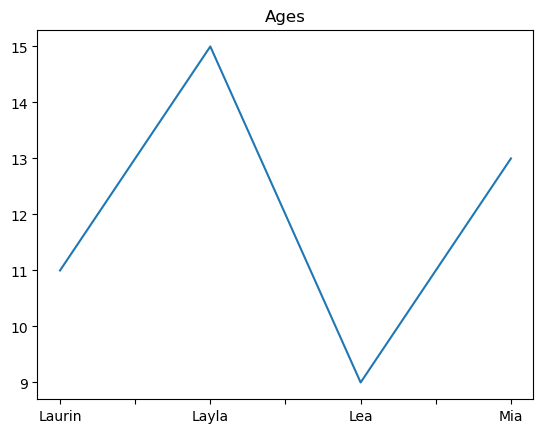

In [61]:
plt = SampleSeries2.sort_index(ascending=True).plot(title = "Ages")

## Dataframe

The Dataframe is what you will work of most when working with Pandas. It is very similar to a spreadsheet. You can also think of it as a combination of multiple Series (the columns) with a common index.

A Dataframe consists of:
- columns: the column labels (like headers in a spreadsheet)
- index: the row index similar to a Series
- values: the actual data

### Creating Dataframes from Python objects

Dataframes can be created by loading data from files and databases as well as from other Python data structures. One common way is to use a dictionary as basis.

In [82]:
dic = {
    'randomValue': np.random.rand(5),
    'someText': ['I', 'love', 'data', 'science', None],
    'aBooleanValue': [np.random.choice([True, False]) for _ in range(5)]}
dic

{'randomValue': array([0.14250143, 0.22828168, 0.79467952, 0.33659562, 0.14393207]),
 'someText': ['I', 'love', 'data', 'science', None],
 'aBooleanValue': [True, True, True, True, False]}

In [110]:
df = pd.DataFrame(dic,
                  index = pd.date_range(
                      end = dt.date(2023, 5, 23),
                      freq = '1D',
                      periods = 5,
                      name = 'Date')
                 )
df

,randomValue,someText,aBooleanValue
Date,,,
2023-05-19,0.142501,I,True
2023-05-20,0.228282,love,True
2023-05-21,0.794680,data,True
2023-05-22,0.336596,science,True
2023-05-23,0.143932,None,False


Examining the contents.

In [111]:
df.index

DatetimeIndex(['2023-05-19', '2023-05-20', '2023-05-21', '2023-05-22',
               '2023-05-23'],
              dtype='datetime64[ns]', name='Date', freq='D')

In [112]:
df.columns

Index(['randomValue', 'someText', 'aBooleanValue'], dtype='object')

In [113]:
df.values

array([[0.14250143251702074, 'I', True],
       [0.22828168328154186, 'love', True],
       [0.7946795187565043, 'data', True],
       [0.33659562473095184, 'science', True],
       [0.14393207497783855, None, False]], dtype=object)

This also works on lists of dictionaries which is very common when working with APIs.

In [88]:
df = pd.DataFrame([
    {'date': '2023-01-01', 'ticker': 'AAPL', 'closing': 159.45},
    {'date': '2023-01-01', 'ticker': 'GOOG', 'closing': 84.3},
    {'date': '2023-01-01', 'ticker': 'FB2A', 'closing': 124.76}])
df

,date,ticker,closing
0,2023-01-01,AAPL,159.45
1,2023-01-01,GOOG,84.30
2,2023-01-01,FB2A,124.76


In order to make a certain colums the index you can use the `set_index` method.

In [90]:
df = df.set_index('date')
df

,ticker,closing
date,,
2023-01-01,AAPL,159.45
2023-01-01,GOOG,84.30
2023-01-01,FB2A,124.76


A dataframe can also have index consisting of multiple columns.

In [91]:
df = pd.DataFrame([
    {'date': '2023-01-01', 'ticker': 'AAPL', 'closing': 159.45},
    {'date': '2023-01-01', 'ticker': 'GOOG', 'closing': 84.3},
    {'date': '2023-01-01', 'ticker': 'FB2A', 'closing': 124.76}])
df

,date,ticker,closing
0,2023-01-01,AAPL,159.45
1,2023-01-01,GOOG,84.30
2,2023-01-01,FB2A,124.76


In [92]:
df = df.set_index(['date', 'ticker'])
df

closing
date       ticker         
2023-01-01 AAPL     159.45
           GOOG      84.30
           FB2A     124.76

Of course dataframes can also be created from one or more Series.

In [96]:
SampleSeries2 = pd.Series([15, 13, 11, 9],
                         name = 'ages',
                         index = ['Layla', 'Mia', 'Laurin', 'Lea'])
print(SampleSeries2)

Layla     15
Mia       13
Laurin    11
Lea        9
Name: ages, dtype: int64


In [99]:
df = pd.DataFrame(SampleSeries2)
df

,ages
Layla,15
Mia,13
Laurin,11
Lea,9


In [100]:
df = SampleSeries2.to_frame()
df

,ages
Layla,15
Mia,13
Laurin,11
Lea,9


If you want to convert multiple Series into one Dataframe you need to do the conversion individually first and then concatenate the Dataframes into one.

In [97]:
SampleSeries3 = pd.Series(['bunny', 'hamster', None, 'hamster'],
                         name = 'pet',
                         index = ['Layla', 'Mia', 'Laurin', 'Lea'])
print(SampleSeries3)

Layla       bunny
Mia       hamster
Laurin       None
Lea       hamster
Name: pet, dtype: object


In [104]:
df2 = SampleSeries2.to_frame()
df3 = SampleSeries3.to_frame()
df = pd.concat([df2, df3], axis=1)
df

,ages,pet
Layla,15,bunny
Mia,13,hamster
Laurin,11,None
Lea,9,hamster


There is another way using the `Dataframe` method.

In [102]:
df = pd.DataFrame([SampleSeries2, SampleSeries3])
df

,Layla,Mia,Laurin,Lea
ages,15,13,11.0,9
pet,bunny,hamster,NaN,hamster


The result has the original index values as columns which is not what we want. An easy fix is to transpose the output.

In [105]:
df = pd.DataFrame([SampleSeries2, SampleSeries3]).T
df

,ages,pet
Layla,15,bunny
Mia,13,hamster
Laurin,11.0,NaN
Lea,9,hamster


### Accessing data in a Dataframe

In [160]:
df = pd.DataFrame({
            'randomValue': np.random.rand(5),
            'someText': ['I', 'love', 'data', 'science', None],
            'aBooleanValue': [np.random.choice([True, False]) for _ in range(5)]
            },
            index = ['Row_1', 'Row_2', 'Row_3', 'Row_4', 'Row_5']
            )
df

,randomValue,someText,aBooleanValue
Row_1,0.251412,I,False
Row_2,0.321268,love,True
Row_3,0.033930,data,True
Row_4,0.751936,science,False
Row_5,0.735792,None,False


#### Accessing columns

In [120]:
df['someText']

Row_1          I
Row_2       love
Row_3       data
Row_4    science
Row_5       None
Name: someText, dtype: object

In [121]:
df['someText'].values

array(['I', 'love', 'data', 'science', None], dtype=object)

If the column name doesn't contain spaces you can also use the .-notation.

In [139]:
df.someText

Row_1          I
Row_2       love
Row_3       data
Row_4    science
Row_5       None
Name: someText, dtype: object

In [140]:
df.someText.values

array(['I', 'love', 'data', 'science', None], dtype=object)

In [141]:
df.someText['Row_2']

'love'

In [144]:
df.someText.values[1]

'love'

#### loc

DataFrame.loc method is a method that takes only index labels and returns row or dataframe if the index label exists in the caller data frame.

In [122]:
df.loc['Row_2']

randomValue      0.056554
someText             love
aBooleanValue        True
Name: Row_2, dtype: object

In [130]:
df.loc['Row_2', :]

randomValue      0.056554
someText             love
aBooleanValue        True
Name: Row_2, dtype: object

In [124]:
df.loc['Row_2', 'someText']

'love'

In [128]:
df.loc['Row_2', ['someText', 'randomValue']]

someText           love
randomValue    0.056554
Name: Row_2, dtype: object

In [129]:
df.loc['Row_2', ['someText', 'randomValue']].values

array(['love', 0.056554139345924126], dtype=object)

In [131]:
df.loc[:, 'someText']

Row_1          I
Row_2       love
Row_3       data
Row_4    science
Row_5       None
Name: someText, dtype: object

In [132]:
df.loc['Row_2':'Row_4', :]

,randomValue,someText,aBooleanValue
Row_2,0.056554,love,True
Row_3,0.589473,data,False
Row_4,0.589737,science,False


In [133]:
df.loc['Row_2':, :]

,randomValue,someText,aBooleanValue
Row_2,0.056554,love,True
Row_3,0.589473,data,False
Row_4,0.589737,science,False
Row_5,0.858771,None,False


#### iloc

Dataframe.iloc method is used when the index label of a data frame is something other than numeric series of 0, 1, 2, 3….n or in case the user doesn’t know the index label. Rows can be extracted using an imaginary index position which isn’t visible in the data frame.

In [134]:
df.iloc[2:4]

,randomValue,someText,aBooleanValue
Row_3,0.589473,data,False
Row_4,0.589737,science,False


In [136]:
df.iloc[[2,4,0]]

,randomValue,someText,aBooleanValue
Row_3,0.589473,data,False
Row_5,0.858771,None,False
Row_1,0.702577,I,False


In [138]:
df.iloc[[2,4,0]]['someText']

Row_3    data
Row_5    None
Row_1       I
Name: someText, dtype: object

#### Boolean subsetting

Another way to subset a dataframe that is very commonly used is to use a boolean vector to select the rows that should be kept.

In [162]:
df['randomValue'] > 0.3

Row_1    False
Row_2     True
Row_3    False
Row_4     True
Row_5     True
Name: randomValue, dtype: bool

In [163]:
df.loc[df['randomValue'] > 0.3]

,randomValue,someText,aBooleanValue
Row_2,0.321268,love,True
Row_4,0.751936,science,False
Row_5,0.735792,None,False
